### This notebook is made for Coventry University's 7088CEM ANN Coursework
By Sunggu Choi

Dataset: https://www.kaggle.com/crowww/a-large-scale-fish-dataset

chois11@uni.coventry.ac.uk

In [1]:
# !pip3 install tensorflow
# !pip install pydot
# !pip install pydotplus
# !sudo apt-get install graphviz for Debian
# https://graphviz.org/download/ for Windows


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization




import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [2]:
!dir Fish_Dataset

 Volume in drive C is Blade 15 SSD
 Volume Serial Number is 3226-871E

 Directory of C:\Users\dkaos\Documents\GitHub\ANN_7088CEM\Fish_Dataset

18/03/2021  15:57    <DIR>          .
18/03/2021  15:57    <DIR>          ..
18/03/2021  15:57    <DIR>          Black Sea Sprat
18/03/2021  15:57    <DIR>          Gilt-Head Bream
18/03/2021  15:57    <DIR>          Hourse Mackerel
18/03/2021  15:57    <DIR>          Red Mullet
18/03/2021  15:57    <DIR>          Red Sea Bream
18/03/2021  15:57    <DIR>          Sea Bass
18/03/2021  15:57    <DIR>          Shrimp
18/03/2021  15:57    <DIR>          Striped Red Mullet
18/03/2021  15:57    <DIR>          Trout
               0 File(s)              0 bytes
              11 Dir(s)  41,020,796,928 bytes free


In [2]:
# Load the dataset
image_size = (244, 244)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Fish_Dataset",
    validation_split=0.2,
    subset="training",
    seed=7566,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Fish_Dataset",
    validation_split=0.2,
    subset="validation",
    seed=7566,
    image_size=image_size,
    batch_size=batch_size,
)

Found 9000 files belonging to 9 classes.
Using 7200 files for training.
Found 9000 files belonging to 9 classes.
Using 1800 files for validation.


### Data Exploration

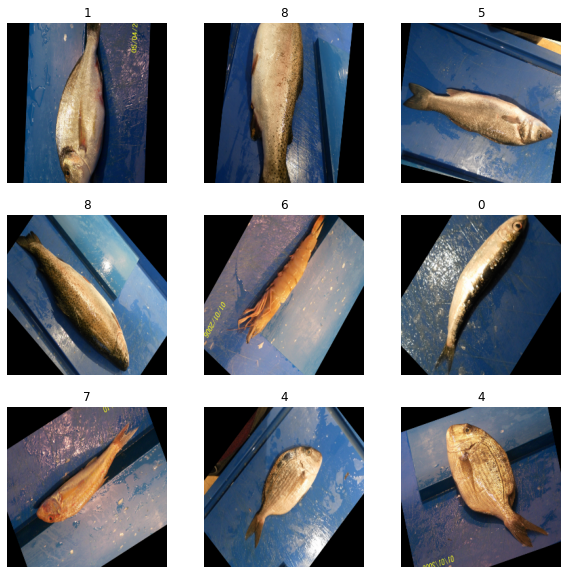

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [6]:
# Image augmentation
# It helps to training by getting a various angle of images

# data_augmentation = Sequential(
#     [
#         layers.experimental.preprocessing.RandomFlip("horizontal"),
#         layers.experimental.preprocessing.RandomRotation(0.1),
#     ]
# )
# plt.figure(figsize=(10, 10))
# for images, _ in train_ds.take(1):
#     for i in range(9):
#         augmented_images = data_augmentation(images)
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(augmented_images[0].numpy().astype("uint8"))
#         plt.axis("off")

### Data standardisation
Since the images are standard size 180x180, with float32, RGB channels are im 0,255 range - Not good for NN

Standardise values into 1,0 by using Rescaling layer at the model

In [3]:
# Dataset IO
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

In [8]:
# This option is for GPU training, applied as part of the model.

# This option is for GPU training, applied as part of the model.

# def CNN_model(input_shape, num_classes):
# First block
input_s = (244, 244, 3)

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = input_s))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

# Second block
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Dense(1))
model.add(Activation('softmax')) # Since it contains more then 2 classes

# tf.keras.utils.plot_model(model, show_shapes=True)

In [6]:
# Load the TensorBoard notebook extension
# %load_ext tensorboard
import datetime
%load_ext tensorboard
%tensorboard --logdir logs/vgg16
# rm -rf ./logs/


ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 54740.

In [10]:
# # Compile model

# epochs = 1

# model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# model.fit(train_ds, validation_data=val_ds, epochs=epochs ,callbacks=[tensorboard_callback])



In [11]:
def vgg_16_model(train_ds, val_ds, input_s, epochs):
    model = Sequential()
    model.add(Conv2D(64, (3,3), padding = "same",input_shape = input_s))
    model.add(Activation("relu"))
    model.add(Conv2D(64, (3,3), padding ="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size = (2,2))) # Avarage pooling

    # Second block
    model.add(Conv2D(128, (3,3), padding ="same"))
    model.add(Activation("relu"))
    model.add(Conv2D(128, (3,3)))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # Third block
    model.add(Conv2D(256, (3,3), padding ="same"))
    model.add(Activation("relu"))
    model.add(Conv2D(256, (3,3), padding ="same"))
    model.add(Activation("relu"))
    model.add(Conv2D(256, (3,3), padding ="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # Forth block
    model.add(Conv2D(512, (3,3), padding ="same"))
    model.add(Activation("relu"))
    model.add(Conv2D(512, (3,3), padding ="same"))
    model.add(Activation("relu"))
    model.add(Conv2D(512, (3,3), padding ="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # Fifth block
    model.add(Conv2D(512, (3,3), padding ="same"))
    model.add(Activation("relu"))
    model.add(Conv2D(512, (3,3), padding ="same"))
    model.add(Activation("relu"))
    model.add(Conv2D(512, (3,3), padding ="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # Connect the layers
    model.add(Flatten())
    model.add(Dense(4096))
    model.add(Activation("relu"))
    model.add(Dense(4096))
    model.add(Activation("relu"))
    
    model.add(Dense(units = 1000, activation ='softmax')) # Since it contains more then 2 classes
    
    model.summary()


    model.compile(loss="SparseCategoricalCrossentropy", optimizer="adam", metrics=["accuracy"])

    log_dir = "logs/vgg16/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

    model.fit(train_ds, validation_data=val_ds, epochs=epochs,callbacks=[tensorboard_callback])
    
# 11 epochs is max

vgg_16_model(train_ds, val_ds, (244, 244, 3), 15)

# Dataset IO
# train_ds = train_ds.prefetch(buffer_size=32)
# val_ds = val_ds.prefetch(buffer_size=32

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 244, 244, 64)      1792      
_________________________________________________________________
activation_3 (Activation)    (None, 244, 244, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 244, 244, 64)      36928     
_________________________________________________________________
activation_4 (Activation)    (None, 244, 244, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 122, 122, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 122, 122, 128)     73856     
_________________________________________________________________
activation_5 (Activation)    (None, 122, 122, 128)    

'kill' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
# Load the TensorBoard notebook extension
# %load_ext tensorboard
import datetime
%load_ext tensorboard
%tensorboard --logdir logs/alexnet_model
# rm -rf ./logs/


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 23000.

In [8]:
def alexNet_model(train_ds, val_ds, input_s, epochs):
    model = Sequential()
    model.add(Conv2D(96, (11,11), strides=(4,4), padding = "same",input_shape = input_s))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (3,3), strides=(4,4))) # Avarage pooling
    
    model.add(Conv2D(256, (3,3), strides=(1,1), padding = "same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (3,3), strides=(2,2))) # Avarage pooling
    
    model.add(Conv2D(384, (3,3), strides=(1,1), padding = "same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization())

    model.add(Conv2D(384, (1,1), strides=(1,1), padding = "same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization())

    model.add(Conv2D(256, (1,1), strides=(1,1), padding = "same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size = (3,3), strides=(2,2))) # Avarage pooling
    
    
    # Connect the layers
    model.add(Flatten())
    model.add(Dense(4096))
    model.add(Dropout(0.5))
    model.add(Activation("relu"))
    
    model.add(Dense(4096))
    model.add(Dropout(0.5))
    model.add(Activation("relu"))
    
    model.add(Dense(units = 10, activation ='softmax')) # Since it contains more then 2 classes
    
    model.summary()


    model.compile(loss="SparseCategoricalCrossentropy", optimizer="adam", metrics=["accuracy"])

    log_dir = "logs/alexnet_model/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

    model.fit(train_ds, validation_data=val_ds, epochs=epochs,callbacks=[tensorboard_callback])
    
# 11 epochs is max

alexNet_model(train_ds, val_ds, (244, 244, 3), 20)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 61, 61, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 61, 61, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 61, 61, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 256)       221440    
_________________________________________________________________
activation_1 (Activation)    (None, 15, 15, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 256)       1